In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import display

In [2]:
import logging
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO, force=True
)

In [3]:
model_name = "bert-base-uncased"
from transformers import BertModel, BertTokenizer
model = BertModel.from_pretrained(model_name,
           output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained(model_name)

In [4]:
import evaluators, utils
ev = evaluators.TransformersEvaluator(model=model,
                                      tokenizer=tokenizer,
                                      model_name=model_name)
ev.load_dataset("../datasets/dataset_1.json")

In [5]:
ev.reset_evaluator()
evaluation = ev.evaluate()

In [6]:
evaluation

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
0,1,animal,"(fauna, 0)",0,0.315067,False,False
1,1,animal,"(africa, 0)",0,0.250819,False,False
2,1,animal,"(broader, 0)",0,0.189065,False,False
3,1,animal,"(sense, 0)",0,0.147454,False,False
4,1,animal,"(animals, 0)",1,0.410767,False,False
...,...,...,...,...,...,...,...
1522,4,resource,"(economic, 0)",0,0.253377,False,False
1523,4,resource,"(benefits, 0)",0,0.232397,False,False
1524,4,resource,"(side, 0)",0,0.136636,False,False
1525,4,resource,"(things, 0)",0,0.242895,False,False


'OOV:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV


'Lost:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
1189,4,disease,"(anti-cancer, 0)",1,NaN,True,False
1458,4,when,"(now, 0)",1,NaN,True,False
1459,4,when,"(now, 1)",1,NaN,True,False


'Statistics:'

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.278357,0.268657,0.423529,0.328767,0.903733,0.265451


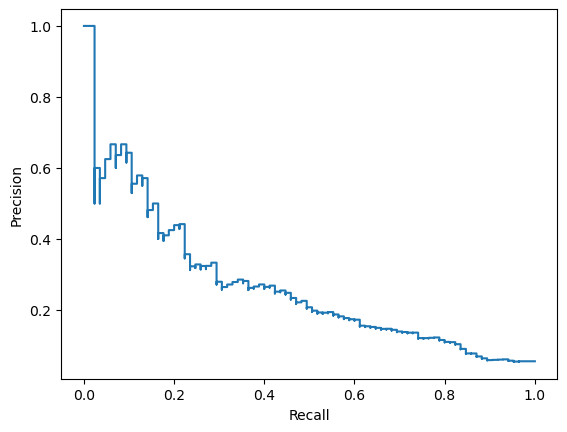

In [7]:
st = utils.Statistics(ev)

display("OOV:")
display(st.get_oov())

display("Lost:")
display(st.get_lost())

stats = st.calculate_statistics()
display("Statistics:")
display(stats)

st.display_PRC()

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.278357,0.268657,0.423529,0.328767,0.903733,0.265451
bert-base-uncased-dot,53.311996,0.266667,0.470588,0.340426,0.898494,0.234968
bert-base-uncased-euc,6.980703,0.120743,0.458824,0.191176,0.783890,0.106553


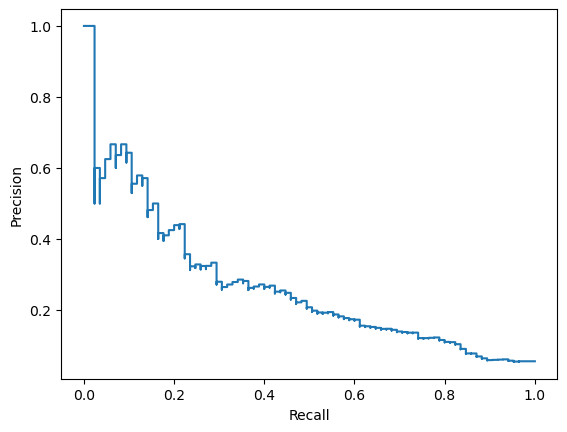

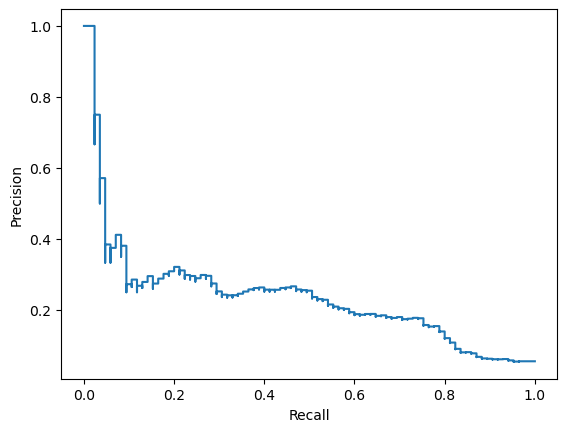

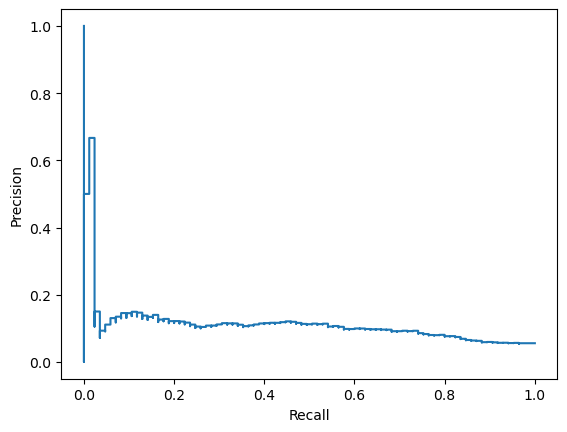

In [8]:
import pandas as pd
methods = [member for member in utils.SimilarityFunction]

results = pd.DataFrame()

for method in methods:
    ev.similarity_method = method
    ev.reset_evaluator()
    data = ev.evaluate()
    st = utils.Statistics(ev)
    stats = st.calculate_statistics()
    st.display_PRC()
    results = pd.concat([results, stats])

display(results)